In [31]:
import pandas as pd
import numpy as np
import re

In [32]:
#NC
#NF means non fixed
pdNCF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesNC_Fixed_nvar_ncon.csv")
pdNCNF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesNC_nvar_ncon.csv")
#AP
pdAPF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesAP_Fixed_nvar_ncon.csv")
pdAPNF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesAP_nvar_ncon.csv")
#drift and delay
pdDDF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedes_Fixed_nvar_ncon.csv")
pdDDNF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedes_nvar_ncon.csv")

#heuristic
pdDDHeur=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedes_HeurPath_nvar_ncon.csv")
pdAPHeur=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesAP_HeurPath_nvar_ncon.csv")
pdNCHeur=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesNC_HeurPath_nvar_ncon.csv")

### Remove data obtained multiple times

In [33]:
pdNCF = pdNCF.drop_duplicates(subset=['instance',"reduceTini"], keep='last')
pdNCNF = pdNCNF.drop_duplicates(subset=['instance',"reduceTini"], keep='last')
pdAPF = pdAPF.drop_duplicates(subset=['instance',"reduceTini"], keep='last')
pdAPNF = pdAPNF.drop_duplicates(subset=['instance',"reduceTini"], keep='last')
pdDDF = pdDDF.drop_duplicates(subset=['instance'], keep='last')
pdDDNF = pdDDNF.drop_duplicates(subset=['instance'], keep='last')
pdDDHeur = pdDDHeur.drop_duplicates(subset=['instance'], keep='last')
pdAPHeur = pdAPHeur.drop_duplicates(subset=['instance'], keep='last')
pdNCHeur = pdNCHeur.drop_duplicates(subset=['instance'], keep='last')

## Generate latex with all information

In [34]:
def move_column(df, col_name, new_pos):
    col = df.pop(col_name)  # Rimuove la colonna
    df.insert(new_pos, col_name, col)  # La inserisce nella nuova posizione
    return df

In [35]:
#NC
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesFixedNC.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(move_column(pdNCF, "reduceTini", 1).rename(columns={'reduceTini': "-Tini"}).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesNC.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(move_column(pdNCNF, "reduceTini", 1).rename(columns={'reduceTini': "-Tini"}).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#AP
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesFixedAP.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(move_column(pdAPF, "reduceTini", 1).rename(columns={'reduceTini': "-Tini"}).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesAP.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(move_column(pdAPNF, "reduceTini", 1).rename(columns={'reduceTini': "-Tini"}).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#Drift and delay
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesFixedDD.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdDDF.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesDD.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdDDNF.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#Heuristic
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesDD_Heur.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdDDHeur.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesAP_Heur.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdAPHeur.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesNC_Heur.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdNCHeur.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

TODO, copy what we have done before master thesis

## Heuristic results

In [36]:
def get_formatted_name(data_name,AP=False,NC=False):
    data_name = data_name.replace("Fixed", "")
    match = re.match(r"([a-zA-Z]+)(\d+)([a-zA-Z0-9-]*)", data_name)
    if match:
        part1 = match.group(1)
        part2 = match.group(3)
        part3 = ""
        if AP:
            part3 = "AP"
        elif NC:
            part3 = "NC"        
        return f"{part1}{part2}{part3}"
    else:
        return data_name  # Caso in cui non ci sia un numero nel nome

In [37]:
def obtainStatsSummary(filtered_merged, columnName, fixed=False,Heur=False, considerUnfeasible=True, AP=False, NC=False):
    if AP or NC:
        Tini = filtered_merged["reduceTini"].iloc[0]
    else:
        Tini = 0
    if fixed:
        columnName=columnName+"Fixed"
    #if Heur:
    #    columnName=columnName+"Heur"
    if considerUnfeasible:
        stats = {
            "Typology":     get_formatted_name(filtered_merged["instance"].iloc[0],AP,NC),
            "Mean":         filtered_merged[columnName].mean(),
            "STD":          filtered_merged[columnName].std(),
            "Min":          filtered_merged[columnName].min(),
            "Max":          filtered_merged[columnName].max(),           
            "TotalCount":   filtered_merged[columnName].count()
        }
        return stats
    stats = {
        "Typology":         get_formatted_name(filtered_merged["instance"].iloc[0],AP,NC),
        "Mean":             filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].mean(),
        "STD":              filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].std(),
        "Min":              filtered_merged[columnName].min(),
        "Max":              filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].max(),
        "CountSolved":      filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].count(),      
        "TotalCount":       filtered_merged[columnName].count()
    }
    return stats

In [38]:
#drift and delay merged
#airport
df_air01=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr0nDe1")]
df_air02=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr0nDe2")]
df_air03=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr0nDe3")]
#df_air10=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr1nDe0")]
#df_air11=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr1nDe1")]
#grid
df_grid01=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr0nDe1")]
df_grid02=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr0nDe2")]
df_grid03=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr0nDe3")]
#df_grid10=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr1nDe0")]
#df_grid11=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr1nDe1")]
#metroplex
df_mp01=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr0nDe1")]
df_mp02=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr0nDe2")]
df_mp03=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr0nDe3")]
#df_mp10=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr1nDe0")]
#df_mp11=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr1nDe1")]

In [39]:
#only contains reduceTini = 0
df_airAP=pdAPHeur[pdAPHeur["instance"].str.contains(r"airport")]
df_gridAP=pdAPHeur[pdAPHeur["instance"].str.contains(r"grid")]
df_mpAP=pdAPHeur[pdAPHeur["instance"].str.contains(r"metroplex")]

df_airNC=pdNCHeur[pdNCHeur["instance"].str.contains(r"airport")]
df_gridNC=pdNCHeur[pdNCHeur["instance"].str.contains(r"grid")]
df_mpNC=pdNCHeur[pdNCHeur["instance"].str.contains(r"metroplex")]


In [40]:
dfsHeur = [df_air01, df_air02, df_air03,
           df_grid01, df_grid02, df_grid03,
           df_mp01, df_mp02, df_mp03]
dfsHeurAP = [df_airAP, df_gridAP, df_mpAP]
dfsHeurNC = [df_airNC, df_gridNC, df_mpNC]

In [41]:
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/SummaryTablesHeur.tex", "w") as f:
    f.write("\\begin{document}\n")

    #prima tabella:  risultati path fissati
    
    results = []
    for i, df in enumerate(dfsHeur):
        stats = obtainStatsSummary(df, "result",Heur=True)
        results.append(stats)
    for i, df in enumerate(dfsHeurAP):
        stats = obtainStatsSummary(df, "result",Heur=True,AP=True)
        results.append(stats)
    for i, df in enumerate(dfsHeurNC):
        stats = obtainStatsSummary(df, "result",Heur=True,NC=True)
        results.append(stats)
    # cambiare da result a obj function value e farlo bold
    #                                                                                                                               comparison between the \\textbf{objective function value} with fixed and non fixed path on Mercedes instances, unfeasible instance are considered only in TotalCount")
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:mercedes:resultsHeur",caption="Statistics about \\textbf{objective function value} obtained from Mercedes instances with all path fixed by the heuristic, unfeasible instances are considered only in TotalCount")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #seconda tabella: elapsed time path fissati

    results = []
    for i, df in enumerate(dfsHeur):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurAP):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurNC):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:elapsedTimeHeur",caption="Statistic about \\textbf{elapsed time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #terza tabella: totalSolveTime path fissati
    results = []
    for i, df in enumerate(dfsHeur):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurAP):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurNC):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalSolveTimeFixed",caption="Statistic about \\textbf{total solve time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quarta tabella: total time path fissati
    results = []
    for i, df in enumerate(dfsHeur):
        stats = obtainStatsSummary(df, "totalTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurAP):
        stats = obtainStatsSummary(df, "totalTime",Heur=True, AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurNC):
        stats = obtainStatsSummary(df, "totalTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalTimeFixed",caption="Statistic about \\textbf{total time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    f.write("\\end{document}")

## Pelegrin instances

### non fixed

In [42]:
#drift and delay non fixed
#airport
dfDDNF_air01=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr0nDe1")]
dfDDNF_air02=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr0nDe2")]
dfDDNF_air03=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr0nDe3")]
dfDDNF_air10=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr1nDe0")]
dfDDNF_air11=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr1nDe1")]
#grid
dfDDNF_grid01=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr0nDe1")]
dfDDNF_grid02=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr0nDe2")]
dfDDNF_grid03=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr0nDe3")]
dfDDNF_grid10=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr1nDe0")]
dfDDNF_grid11=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr1nDe1")]
#metroplex
dfDDNF_mp01=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr0nDe1")]
dfDDNF_mp02=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr0nDe2")]
dfDDNF_mp03=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr0nDe3")]
dfDDNF_mp10=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr1nDe0")]
dfDDNF_mp11=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr1nDe1")]

In [43]:
#high priority non fixed
dfAPNF_air=pdAPNF[pdAPNF["instance"].str.contains(r"airport")]
dfAPNF_grid=pdAPNF[pdAPNF["instance"].str.contains(r"grid")]
dfAPNF_mp=pdAPNF[pdAPNF["instance"].str.contains(r"metroplex")]

#non collaborative intruder non fixed
dfNCNF_air=pdNCNF[pdNCNF["instance"].str.contains(r"airport")]
dfNCNF_grid=pdNCNF[pdNCNF["instance"].str.contains(r"grid")]
dfNCNF_mp=pdNCNF[pdNCNF["instance"].str.contains(r"metroplex")]

In [44]:
dfsDDNF = [dfDDNF_air01, dfDDNF_air02, dfDDNF_air03, dfDDNF_air10, dfDDNF_air11,
           dfDDNF_grid01, dfDDNF_grid02, dfDDNF_grid03, dfDDNF_grid10, dfDDNF_grid11,
           dfDDNF_mp01, dfDDNF_mp02, dfDDNF_mp03, dfDDNF_mp10, dfDDNF_mp11]
dfsAPNF = [dfAPNF_air, dfAPNF_grid, dfAPNF_mp]
dfsNCNF = [dfNCNF_air, dfNCNF_grid, dfNCNF_mp]

In [45]:
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/SummaryTablesNonFixed.tex", "w") as f:
    f.write("\\begin{document}\n")

    #prima tabella:  risultati path fissati
    
    results = []
    for i, df in enumerate(dfsDDNF):
        stats = obtainStatsSummary(df, "result",Heur=True)
        results.append(stats)
    for i, df in enumerate(dfsAPNF):
        stats = obtainStatsSummary(df, "result",Heur=True,AP=True)
        results.append(stats)
    for i, df in enumerate(dfsNCNF):
        stats = obtainStatsSummary(df, "result",Heur=True,NC=True)
        results.append(stats)
    # cambiare da result a obj function value e farlo bold
    #                                                                                                                               comparison between the \\textbf{objective function value} with fixed and non fixed path on Mercedes instances, unfeasible instance are considered only in TotalCount")
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:mercedes:resultsHeur",caption="Statistics about \\textbf{objective function value} obtained from Mercedes instances with all path fixed by the heuristic, unfeasible instances are considered only in TotalCount")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #seconda tabella: elapsed time path fissati

    results = []
    for i, df in enumerate(dfsDDNF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPNF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCNF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:elapsedTimeHeur",caption="Statistic about \\textbf{elapsed time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #terza tabella: totalSolveTime path fissati
    results = []
    for i, df in enumerate(dfsDDNF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPNF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCNF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalSolveTimeFixed",caption="Statistic about \\textbf{total solve time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quarta tabella: total time path fissati
    results = []
    for i, df in enumerate(dfsDDNF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPNF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True, AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCNF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalTimeFixed",caption="Statistic about \\textbf{total time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    f.write("\\end{document}")

### fixed

In [46]:
#drift and delay fixed
#airport
dfDDF_air01=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr0nDe1")]
dfDDF_air02=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr0nDe2")]
dfDDF_air03=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr0nDe3")]
dfDDF_air10=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr1nDe0")]
dfDDF_air11=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr1nDe1")]
#grid
dfDDF_grid01=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr0nDe1")]
dfDDF_grid02=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr0nDe2")]
dfDDF_grid03=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr0nDe3")]
dfDDF_grid10=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr1nDe0")]
dfDDF_grid11=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr1nDe1")]
#metroplex
dfDDF_mp01=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr0nDe1")]
dfDDF_mp02=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr0nDe2")]
dfDDF_mp03=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr0nDe3")]
dfDDF_mp10=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr1nDe0")]
dfDDF_mp11=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr1nDe1")]

In [47]:
#high priority fixed
dfAPF_air=pdAPF[pdAPF["instance"].str.contains(r"airport")]
dfAPF_grid=pdAPF[pdAPF["instance"].str.contains(r"grid")]
dfAPF_mp=pdAPF[pdAPF["instance"].str.contains(r"metroplex")]

#non collaborative intruder fixed
dfNCF_air=pdNCF[pdNCF["instance"].str.contains(r"airport")]
dfNCF_grid=pdNCF[pdNCF["instance"].str.contains(r"grid")]
dfNCF_mp=pdNCF[pdNCF["instance"].str.contains(r"metroplex")]

In [48]:
dfsDDF = [dfDDF_air01, dfDDF_air02, dfDDF_air03, dfDDF_air10, dfDDF_air11,
           dfDDF_grid01, dfDDF_grid02, dfDDF_grid03, dfDDF_grid10, dfDDF_grid11,
           dfDDF_mp01, dfDDF_mp02, dfDDF_mp03, dfDDF_mp10, dfDDF_mp11]
dfsAPF = [dfAPF_air, dfAPF_grid, dfAPF_mp]
dfsNCF = [dfNCF_air, dfNCF_grid, dfNCF_mp]

In [49]:
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/SummaryTablesFixed.tex", "w") as f:
    f.write("\\begin{document}\n")

    #prima tabella:  risultati path fissati
    
    results = []
    for i, df in enumerate(dfsDDF):
        stats = obtainStatsSummary(df, "result",Heur=True)
        results.append(stats)
    for i, df in enumerate(dfsAPF):
        stats = obtainStatsSummary(df, "result",Heur=True,AP=True)
        results.append(stats)
    for i, df in enumerate(dfsNCF):
        stats = obtainStatsSummary(df, "result",Heur=True,NC=True)
        results.append(stats)
    # cambiare da result a obj function value e farlo bold
    #                                                                                                                               comparison between the \\textbf{objective function value} with fixed and non fixed path on Mercedes instances, unfeasible instance are considered only in TotalCount")
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:mercedes:resultsHeur",caption="Statistics about \\textbf{objective function value} obtained from Mercedes instances with all path fixed by the heuristic, unfeasible instances are considered only in TotalCount")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #seconda tabella: elapsed time path fissati

    results = []
    for i, df in enumerate(dfsDDF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:elapsedTimeHeur",caption="Statistic about \\textbf{elapsed time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #terza tabella: totalSolveTime path fissati
    results = []
    for i, df in enumerate(dfsDDF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalSolveTimeFixed",caption="Statistic about \\textbf{total solve time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quarta tabella: total time path fissati
    results = []
    for i, df in enumerate(dfsDDF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True, AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalTimeFixed",caption="Statistic about \\textbf{total time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    f.write("\\end{document}")

# Results

Comparison of Solved Instances:
             Typology   Approach  Avg_Result  Avg_TotalTime  Avg_ElapsedTime  Solved_Count
0     airportnDr0nDe1      Fixed    1.483053       0.846031         0.490566            98
1     airportnDr0nDe1  Non-Fixed    1.474326       0.946968         0.498413            99
2     airportnDr0nDe1  Heuristic    1.474326       1.209020         0.526775            99
3     airportnDr0nDe2      Fixed    2.018271       0.887703         0.503007            98
4     airportnDr0nDe2  Non-Fixed    2.002695       1.003531         0.506638            99
5     airportnDr0nDe2  Heuristic    2.002695       1.102492         0.545594            99
6     airportnDr0nDe3      Fixed    2.008030       0.911773         0.479590            98
7     airportnDr0nDe3  Non-Fixed    2.007569       1.120062         0.518888            99
8     airportnDr0nDe3  Heuristic    2.007569       1.254905         0.563185            99
9        gridnDr0nDe1      Fixed    4.837168       2.80431

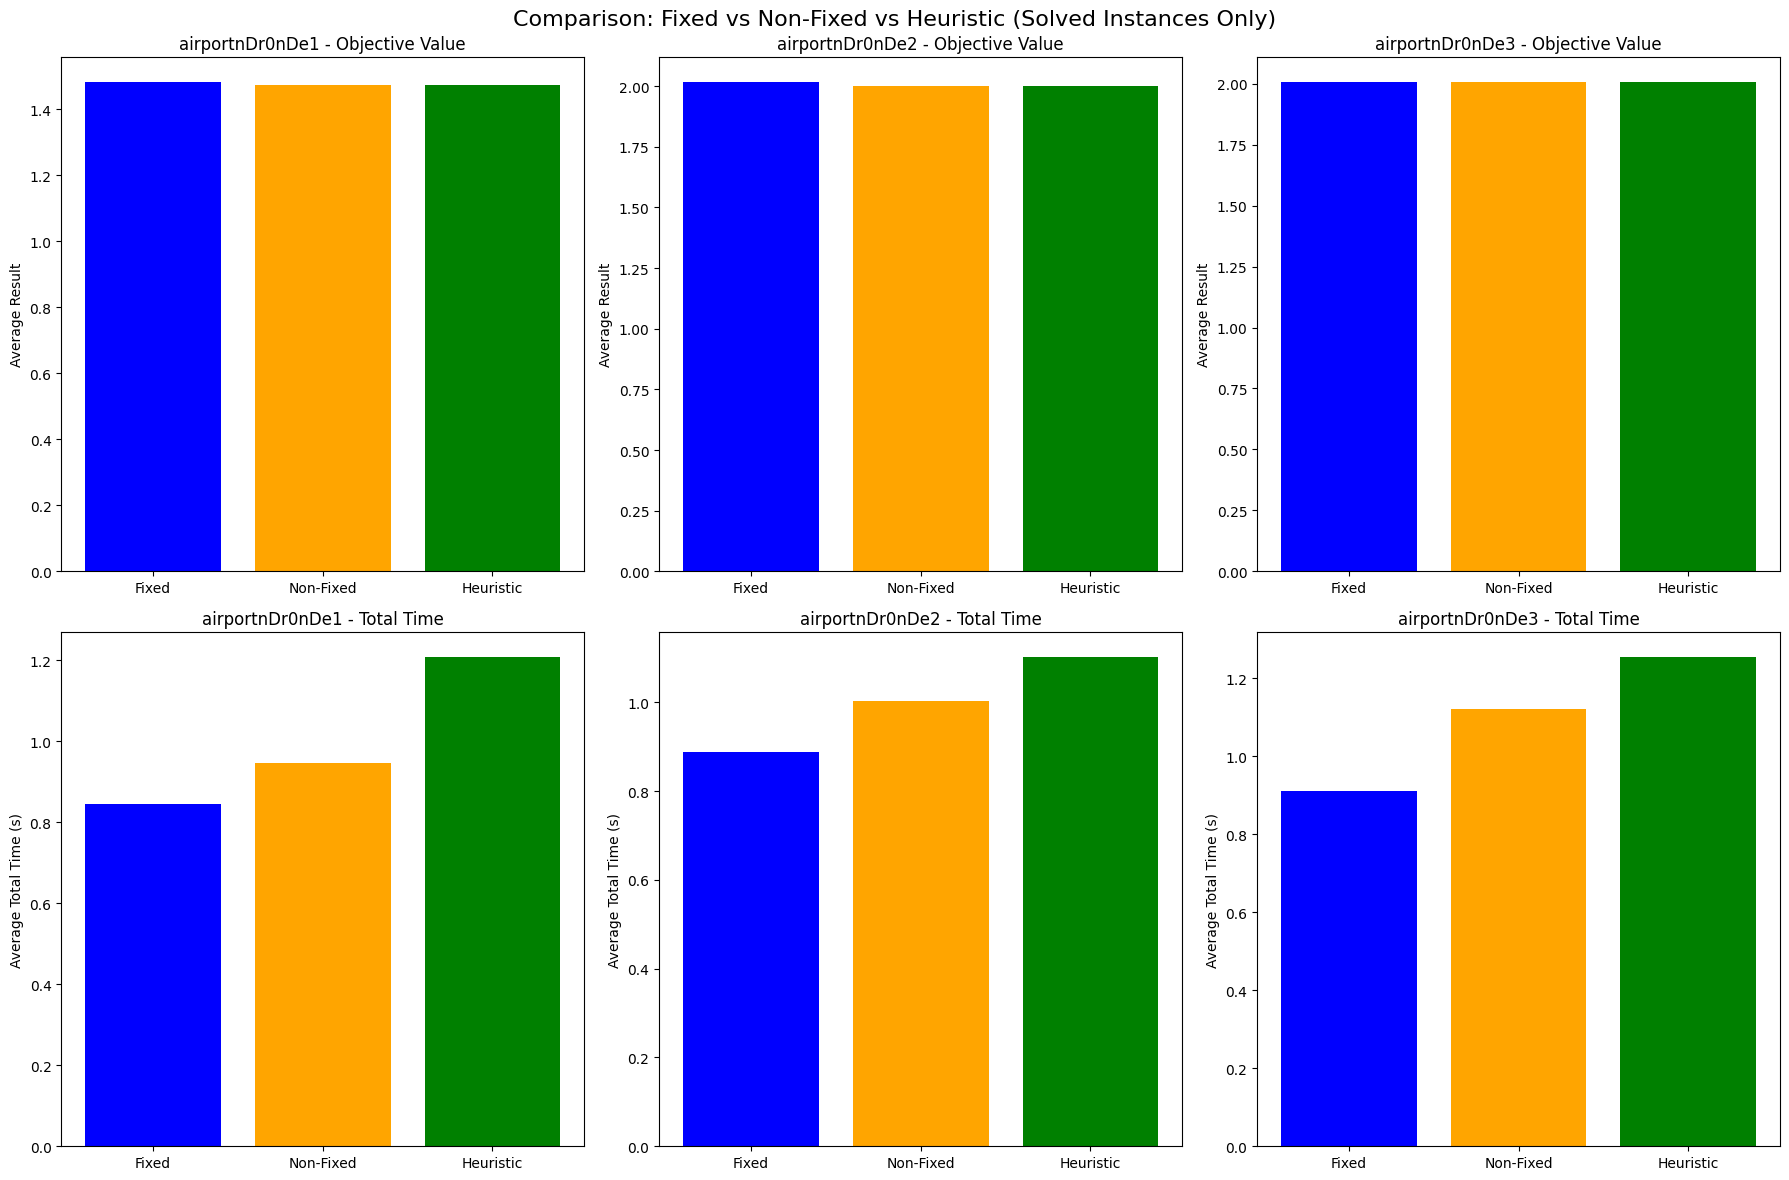


Detailed Differences (Fixed vs Non-Fixed where result differs > 2e-6):
          instance      Typology  result_Fixed  result_NonFixed  Improvement
24  grid28nDr0nDe1  gridnDr0nDe1      6.100251         6.000000     0.100251
29  grid34nDr0nDe1  gridnDr0nDe1     12.190476        12.090226     0.100250
33  grid40nDr0nDe1  gridnDr0nDe1     10.310777        10.210526     0.100251
65  grid72nDr0nDe1  gridnDr0nDe1      7.443609         6.837093     0.606516
59  grid57nDr0nDe2  gridnDr0nDe2      9.944862         9.844612     0.100250
61  grid68nDr0nDe2  gridnDr0nDe2      9.624060         9.523810     0.100250
64  grid65nDr0nDe2  gridnDr0nDe2     10.601504        10.501253     0.100251
69  grid75nDr0nDe2  gridnDr0nDe2      9.350877         6.809524     2.541353
30  grid34nDr0nDe3  gridnDr0nDe3     10.842105        10.741855     0.100250
58  grid63nDr0nDe3  gridnDr0nDe3     20.456140        19.807018     0.649122

Total instances with different results: 68


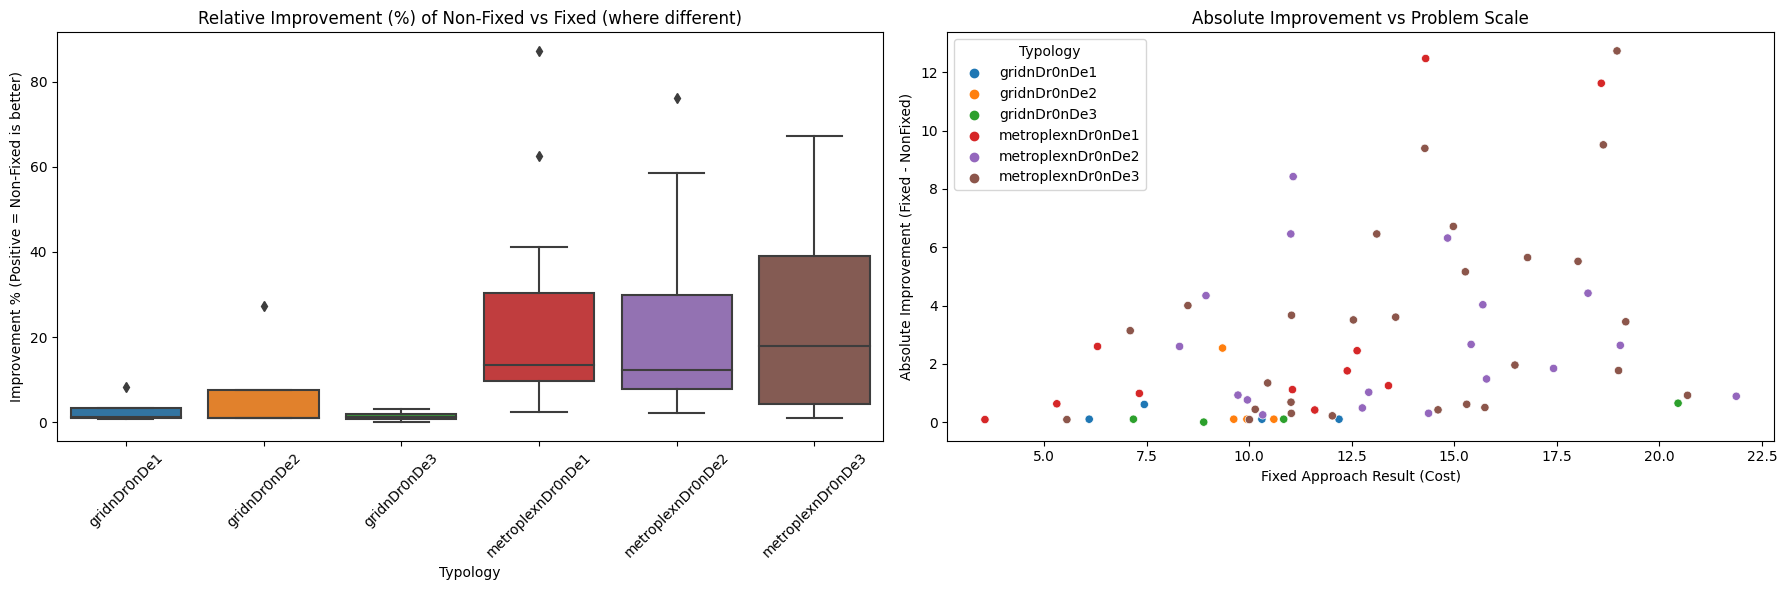

In [50]:
# Create a comparison of time and objective value across fixed, non-fixed, and heuristic approaches

# Prepare data for comparison - focusing on Drift and Delay instances
comparison_data = []
unsolved_summary = []
detailed_diffs = []

# Extract typologies (airport, grid, metroplex with different drift/delay combinations)
typologies = ['airportnDr0nDe1', 'airportnDr0nDe2', 'airportnDr0nDe3',
              'gridnDr0nDe1', 'gridnDr0nDe2', 'gridnDr0nDe3',
              'metroplexnDr0nDe1', 'metroplexnDr0nDe2', 'metroplexnDr0nDe3']

def process_approach(df, typology, approach_name):
    if df.empty:
        return None
        
    # Identify solved (finite result) and unsolved (infinite result)
    solved = df[np.isfinite(df['result'])]
    unsolved = df[~np.isfinite(df['result'])]
    
    # Record unsolved instances if any
    if not unsolved.empty:
        unsolved_summary.append({
            'Typology': typology,
            'Approach': approach_name,
            'Unsolved_Count': len(unsolved),
            'Unsolved_Instances': unsolved['instance'].tolist()
        })
    
    # Return stats only for solved instances
    if not solved.empty:
        return {
            'Typology': typology,
            'Approach': approach_name,
            'Avg_Result': solved['result'].mean(),
            'Avg_TotalTime': solved['totalTime'].mean(),
            'Avg_ElapsedTime': solved['elapsedTime'].mean(),
            'Solved_Count': len(solved)
        }
    return None

for typ in typologies:
    # Insert regex for digits (\d+) before 'nDr' to match instances like 'airport10nDr...'
    pattern = typ.replace('nDr', r'\d+nDr')
    
    # Get dataframes
    def _filter_by_pattern_and_reduce(df):
        mask = df['instance'].str.contains(pattern)
        if 'reduceTini' in df.columns:
            mask &= df['reduceTini'] == 0
        return df[mask]

    fixed_df = pd.concat([_filter_by_pattern_and_reduce(df) for df in dfsDDF], ignore_index=False)
    nonfixed_df = pd.concat([_filter_by_pattern_and_reduce(df) for df in dfsDDNF], ignore_index=False)
    heur_df = pd.concat([df[df['instance'].str.contains(pattern)] for df in dfsHeur], ignore_index=False)

    # Process summaries
    res_fixed = process_approach(fixed_df, typ, 'Fixed')
    if res_fixed: comparison_data.append(res_fixed)
    
    res_nonfixed = process_approach(nonfixed_df, typ, 'Non-Fixed')
    if res_nonfixed: comparison_data.append(res_nonfixed)
    
    res_heur = process_approach(heur_df, typ, 'Heuristic')
    if res_heur: comparison_data.append(res_heur)

    # Calculate detailed differences (Fixed vs Non-Fixed)
    # Merge on instance to compare same instances
    merged = pd.merge(fixed_df[['instance', 'result', 'totalTime']], 
                      nonfixed_df[['instance', 'result', 'totalTime']], 
                      on='instance', suffixes=('_Fixed', '_NonFixed'))
    
    # Filter for valid results in both
    merged = merged[np.isfinite(merged['result_Fixed']) & np.isfinite(merged['result_NonFixed'])]
    
    # Find where results differ significantly (tolerance 2e-6)
    diff_mask = np.abs(merged['result_Fixed'] - merged['result_NonFixed']) > 2e-6
    diffs = merged[diff_mask].copy()
    
    if not diffs.empty:
        diffs['Typology'] = typ
        diffs['Improvement'] = diffs['result_Fixed'] - diffs['result_NonFixed'] # Positive if NonFixed is better (lower cost)
        diffs['Rel_Improvement'] = (diffs['Improvement'] / diffs['result_Fixed']) * 100
        detailed_diffs.append(diffs)

comparison_df = pd.DataFrame(comparison_data)
print("Comparison of Solved Instances:")
print(comparison_df.to_string())

if unsolved_summary:
    print("\nSummary of Unsolved Instances (Infinite Result):")
    unsolved_df = pd.DataFrame(unsolved_summary)
    print(unsolved_df[['Typology', 'Approach', 'Unsolved_Count']].to_string())

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. General Comparison (Bar Charts)
if not comparison_df.empty:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comparison: Fixed vs Non-Fixed vs Heuristic (Solved Instances Only)', fontsize=16)

    typologies_to_plot = typologies[:3]  # Show first 3 typologies as example

    for idx, typ in enumerate(typologies_to_plot):
        data = comparison_df[comparison_df['Typology'] == typ]
        
        if not data.empty:
            # Plot objective value
            axes[0, idx].bar(data['Approach'], data['Avg_Result'], color=['blue', 'orange', 'green'])
            axes[0, idx].set_title(f'{typ} - Objective Value')
            axes[0, idx].set_ylabel('Average Result')
            
            # Plot total time
            axes[1, idx].bar(data['Approach'], data['Avg_TotalTime'], color=['blue', 'orange', 'green'])
            axes[1, idx].set_title(f'{typ} - Total Time')
            axes[1, idx].set_ylabel('Average Total Time (s)')

    plt.tight_layout()
    plt.show()

# 2. Improvement Analysis (Scatter/Box Plots for differences)
if detailed_diffs:
    all_diffs = pd.concat(detailed_diffs)
    
    print("\nDetailed Differences (Fixed vs Non-Fixed where result differs > 2e-6):")
    print(all_diffs[['instance', 'Typology', 'result_Fixed', 'result_NonFixed', 'Improvement']].head(10).to_string())
    print(f"\nTotal instances with different results: {len(all_diffs)}")

    # Plot improvements
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    
    # Boxplot of relative improvement by typology
    sns.boxplot(x='Typology', y='Rel_Improvement', data=all_diffs, ax=ax[0])
    ax[0].set_title('Relative Improvement (%) of Non-Fixed vs Fixed (where different)')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
    ax[0].set_ylabel('Improvement % (Positive = Non-Fixed is better)')
    
    # Scatter plot of improvement vs Fixed Result magnitude
    sns.scatterplot(x='result_Fixed', y='Improvement', hue='Typology', data=all_diffs, ax=ax[1])
    ax[1].set_title('Absolute Improvement vs Problem Scale')
    ax[1].set_xlabel('Fixed Approach Result (Cost)')
    ax[1].set_ylabel('Absolute Improvement (Fixed - NonFixed)')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nNo differences found between Fixed and Non-Fixed results in the analyzed typologies.")

--- High Priority (AP) Analysis ---
Comparison of Solved Instances (AP):
    Typology   Approach   Avg_Result  Avg_TotalTime  Avg_ElapsedTime  Solved_Count
0    airport      Fixed   715.811186       1.585380         0.787954           294
1    airport  Non-Fixed   708.603073       1.646817         0.796748           297
2    airport  Heuristic   728.834510       1.794479         0.859156            99
3       grid      Fixed  1262.968346       4.990573         3.564065           300
4       grid  Non-Fixed  1213.598513       6.292811         3.598227           300
5       grid  Heuristic  1367.914012    1975.790536         3.824806            97
6  metroplex      Fixed  1092.146671       6.528672         4.174364           300
7  metroplex  Non-Fixed   862.424839      16.723261         4.262182           300
8  metroplex  Heuristic   779.932863   10254.995832         4.719747            88


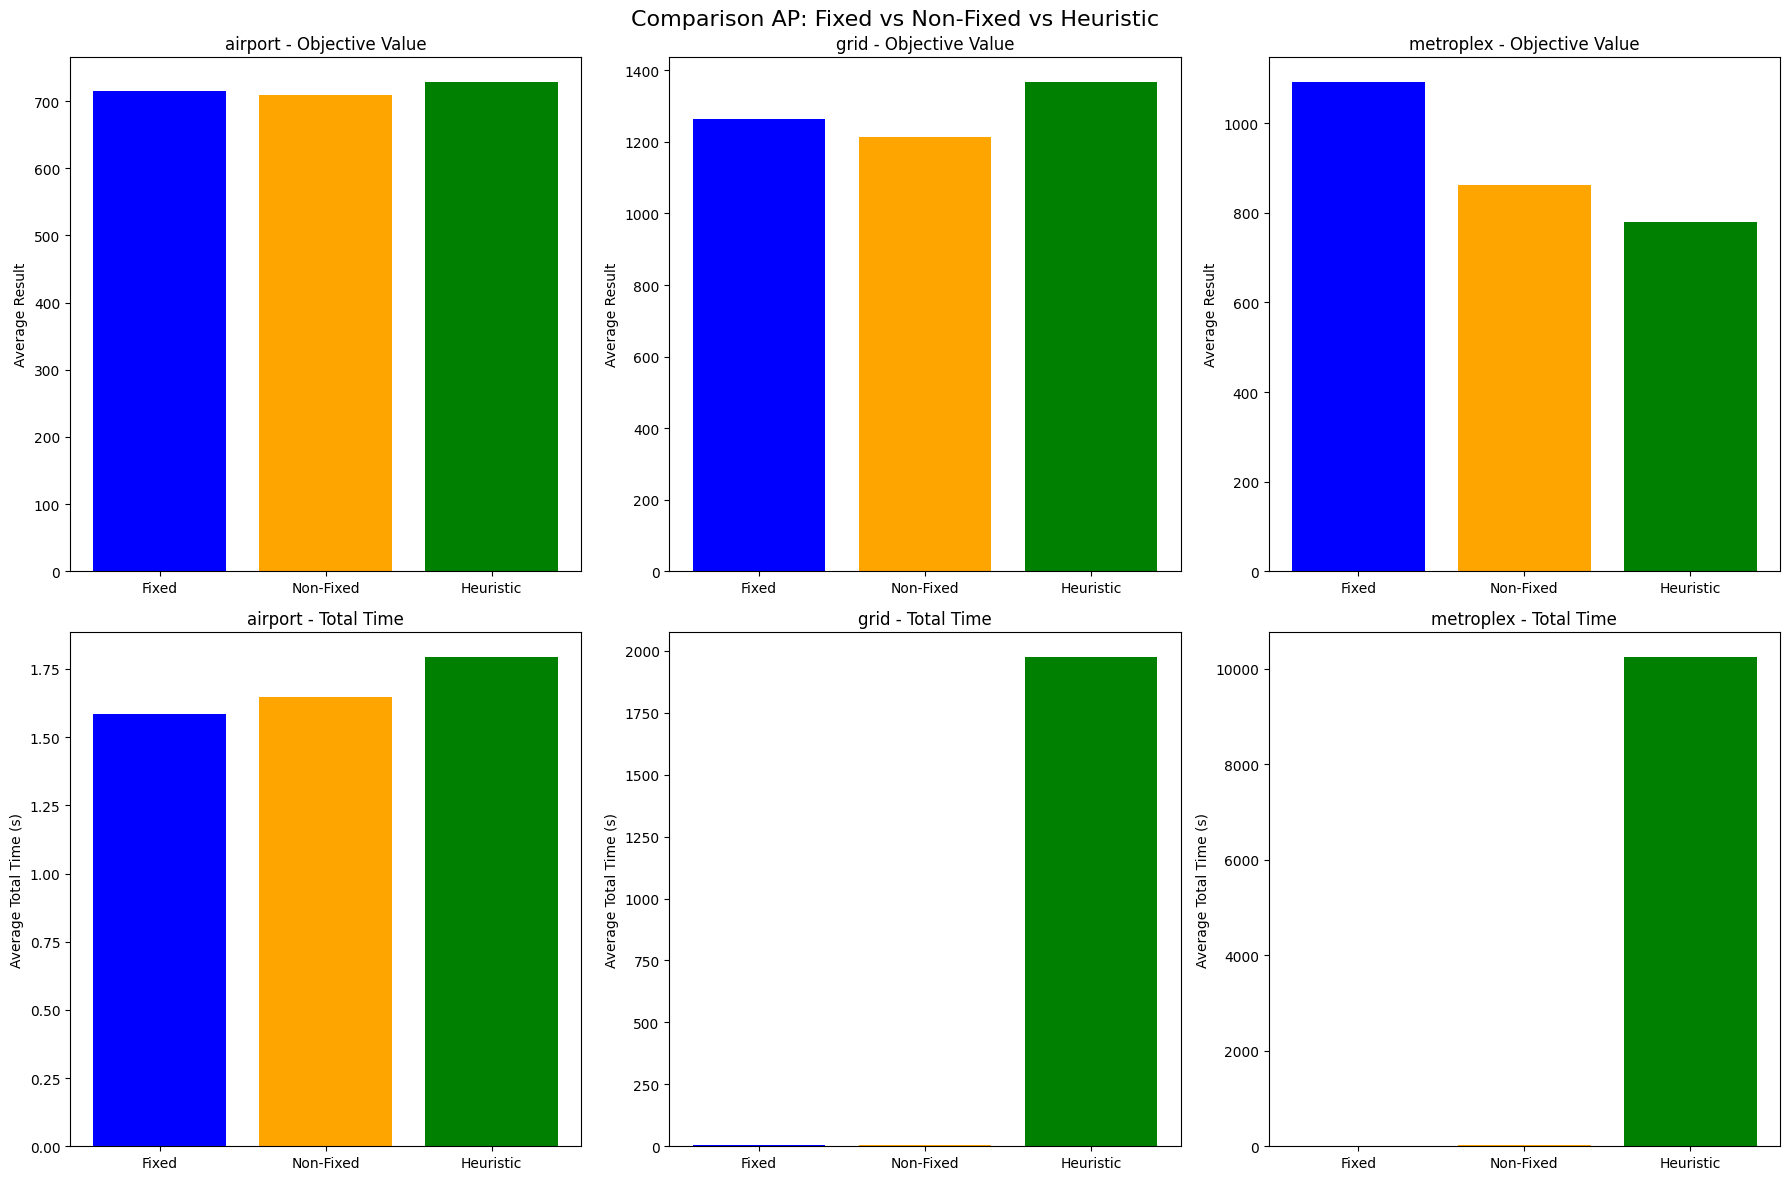


Detailed Differences AP (> 2e-6):
     instance Typology  result_Fixed  result_NonFixed  Improvement
1   airport23  airport      1.315789         1.210526     0.105263
2   airport23  airport      1.315789         1.157895     0.157894
3   airport23  airport      1.210526         1.315789    -0.105263
5   airport23  airport      1.210526         1.157895     0.052631
6   airport23  airport      1.157895         1.315789    -0.157894
7   airport23  airport      1.157895         1.210526    -0.052631
10  airport30  airport   1001.473684      1001.368421     0.105263
11  airport30  airport   1001.473684      1001.263158     0.210526
12  airport30  airport   1001.368421      1001.473684    -0.105263
14  airport30  airport   1001.368421      1001.263158     0.105263


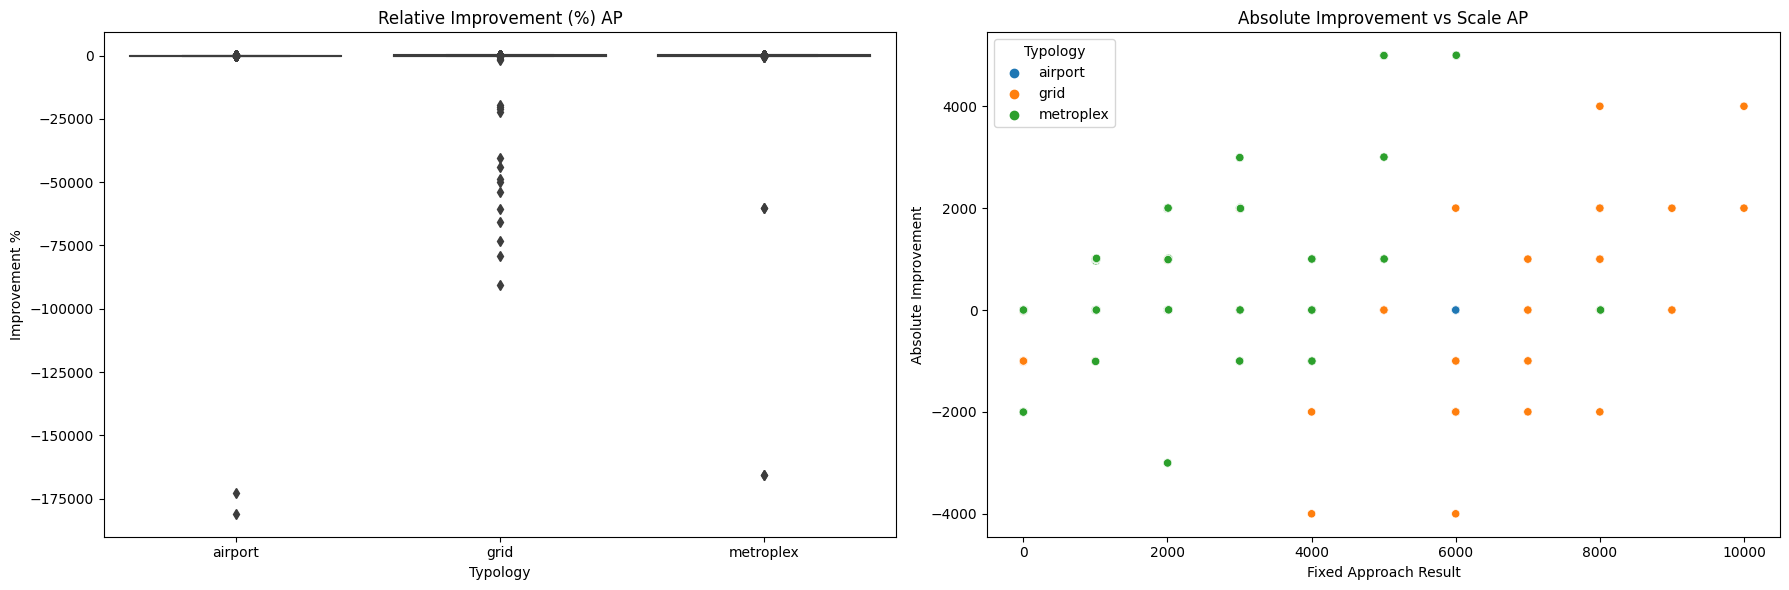

In [51]:
# Comparison for High Priority (AP) instances
print("--- High Priority (AP) Analysis ---")

comparison_data_AP = []
unsolved_summary_AP = []
detailed_diffs_AP = []

typologies_AP = ['airport', 'grid', 'metroplex']

for typ in typologies_AP:
    # Fixed approach
    fixed_data = pd.concat([df[df['instance'].str.contains(typ)] for df in dfsAPF], ignore_index=False)
    res_fixed = process_approach(fixed_data, typ, 'Fixed')
    if res_fixed: comparison_data_AP.append(res_fixed)
    
    # Non-fixed approach
    nonfixed_data = pd.concat([df[df['instance'].str.contains(typ)] for df in dfsAPNF], ignore_index=False)
    res_nonfixed = process_approach(nonfixed_data, typ, 'Non-Fixed')
    if res_nonfixed: comparison_data_AP.append(res_nonfixed)
    
    # Heuristic approach
    heur_data = pd.concat([df[df['instance'].str.contains(typ)] for df in dfsHeurAP], ignore_index=False)
    res_heur = process_approach(heur_data, typ, 'Heuristic')
    if res_heur: comparison_data_AP.append(res_heur)

    # Differences
    merged = pd.merge(fixed_data[['instance', 'result', 'totalTime']], 
                      nonfixed_data[['instance', 'result', 'totalTime']], 
                      on='instance', suffixes=('_Fixed', '_NonFixed'))
    merged = merged[np.isfinite(merged['result_Fixed']) & np.isfinite(merged['result_NonFixed'])]
    diff_mask = np.abs(merged['result_Fixed'] - merged['result_NonFixed']) > 2e-6
    diffs = merged[diff_mask].copy()
    
    if not diffs.empty:
        diffs['Typology'] = typ
        diffs['Improvement'] = diffs['result_Fixed'] - diffs['result_NonFixed']
        diffs['Rel_Improvement'] = (diffs['Improvement'] / diffs['result_Fixed']) * 100
        detailed_diffs_AP.append(diffs)

comparison_df_AP = pd.DataFrame(comparison_data_AP)
print("Comparison of Solved Instances (AP):")
print(comparison_df_AP.to_string())

if unsolved_summary_AP:
    print("\nSummary of Unsolved Instances (AP):")
    print(pd.DataFrame(unsolved_summary_AP)[['Typology', 'Approach', 'Unsolved_Count']].to_string())

# Visualization
if not comparison_df_AP.empty:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comparison AP: Fixed vs Non-Fixed vs Heuristic', fontsize=16)
    
    for idx, typ in enumerate(typologies_AP):
        data = comparison_df_AP[comparison_df_AP['Typology'] == typ]
        if not data.empty:
            axes[0, idx].bar(data['Approach'], data['Avg_Result'], color=['blue', 'orange', 'green'])
            axes[0, idx].set_title(f'{typ} - Objective Value')
            axes[0, idx].set_ylabel('Average Result')
            axes[1, idx].bar(data['Approach'], data['Avg_TotalTime'], color=['blue', 'orange', 'green'])
            axes[1, idx].set_title(f'{typ} - Total Time')
            axes[1, idx].set_ylabel('Average Total Time (s)')
    plt.tight_layout()
    plt.show()

if detailed_diffs_AP:
    all_diffs_AP = pd.concat(detailed_diffs_AP)
    print("\nDetailed Differences AP (> 2e-6):")
    print(all_diffs_AP[['instance', 'Typology', 'result_Fixed', 'result_NonFixed', 'Improvement']].head(10).to_string())
    
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    sns.boxplot(x='Typology', y='Rel_Improvement', data=all_diffs_AP, ax=ax[0])
    ax[0].set_title('Relative Improvement (%) AP')
    ax[0].set_ylabel('Improvement %')
    sns.scatterplot(x='result_Fixed', y='Improvement', hue='Typology', data=all_diffs_AP, ax=ax[1])
    ax[1].set_title('Absolute Improvement vs Scale AP')
    ax[1].set_xlabel('Fixed Approach Result')
    ax[1].set_ylabel('Absolute Improvement')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo significant differences found for AP.")

--- Non-Collaborative (NC) Analysis ---
Comparison of Solved Instances (NC):
    Typology   Approach  Avg_Result  Avg_TotalTime  Avg_ElapsedTime  Solved_Count
0    airport      Fixed    1.611276       1.269537         0.941567            87
1    airport  Non-Fixed    2.223369       1.436830         0.991373            97
2    airport  Heuristic    2.307888       1.541522         1.007001            31
3       grid      Fixed    3.732139       4.717365         3.674959            43
4       grid  Non-Fixed    8.004985       9.912260         4.000289            57
5       grid  Heuristic   23.022317      16.378490         4.223526            17
6  metroplex      Fixed    6.268103       5.772944         4.577362            97
7  metroplex  Non-Fixed    7.724700      14.761727         5.664320           123
8  metroplex  Heuristic   19.524330     953.354765         6.016212            32

Total instances solved by Non-Fixed but NOT by Fixed (NC): 156


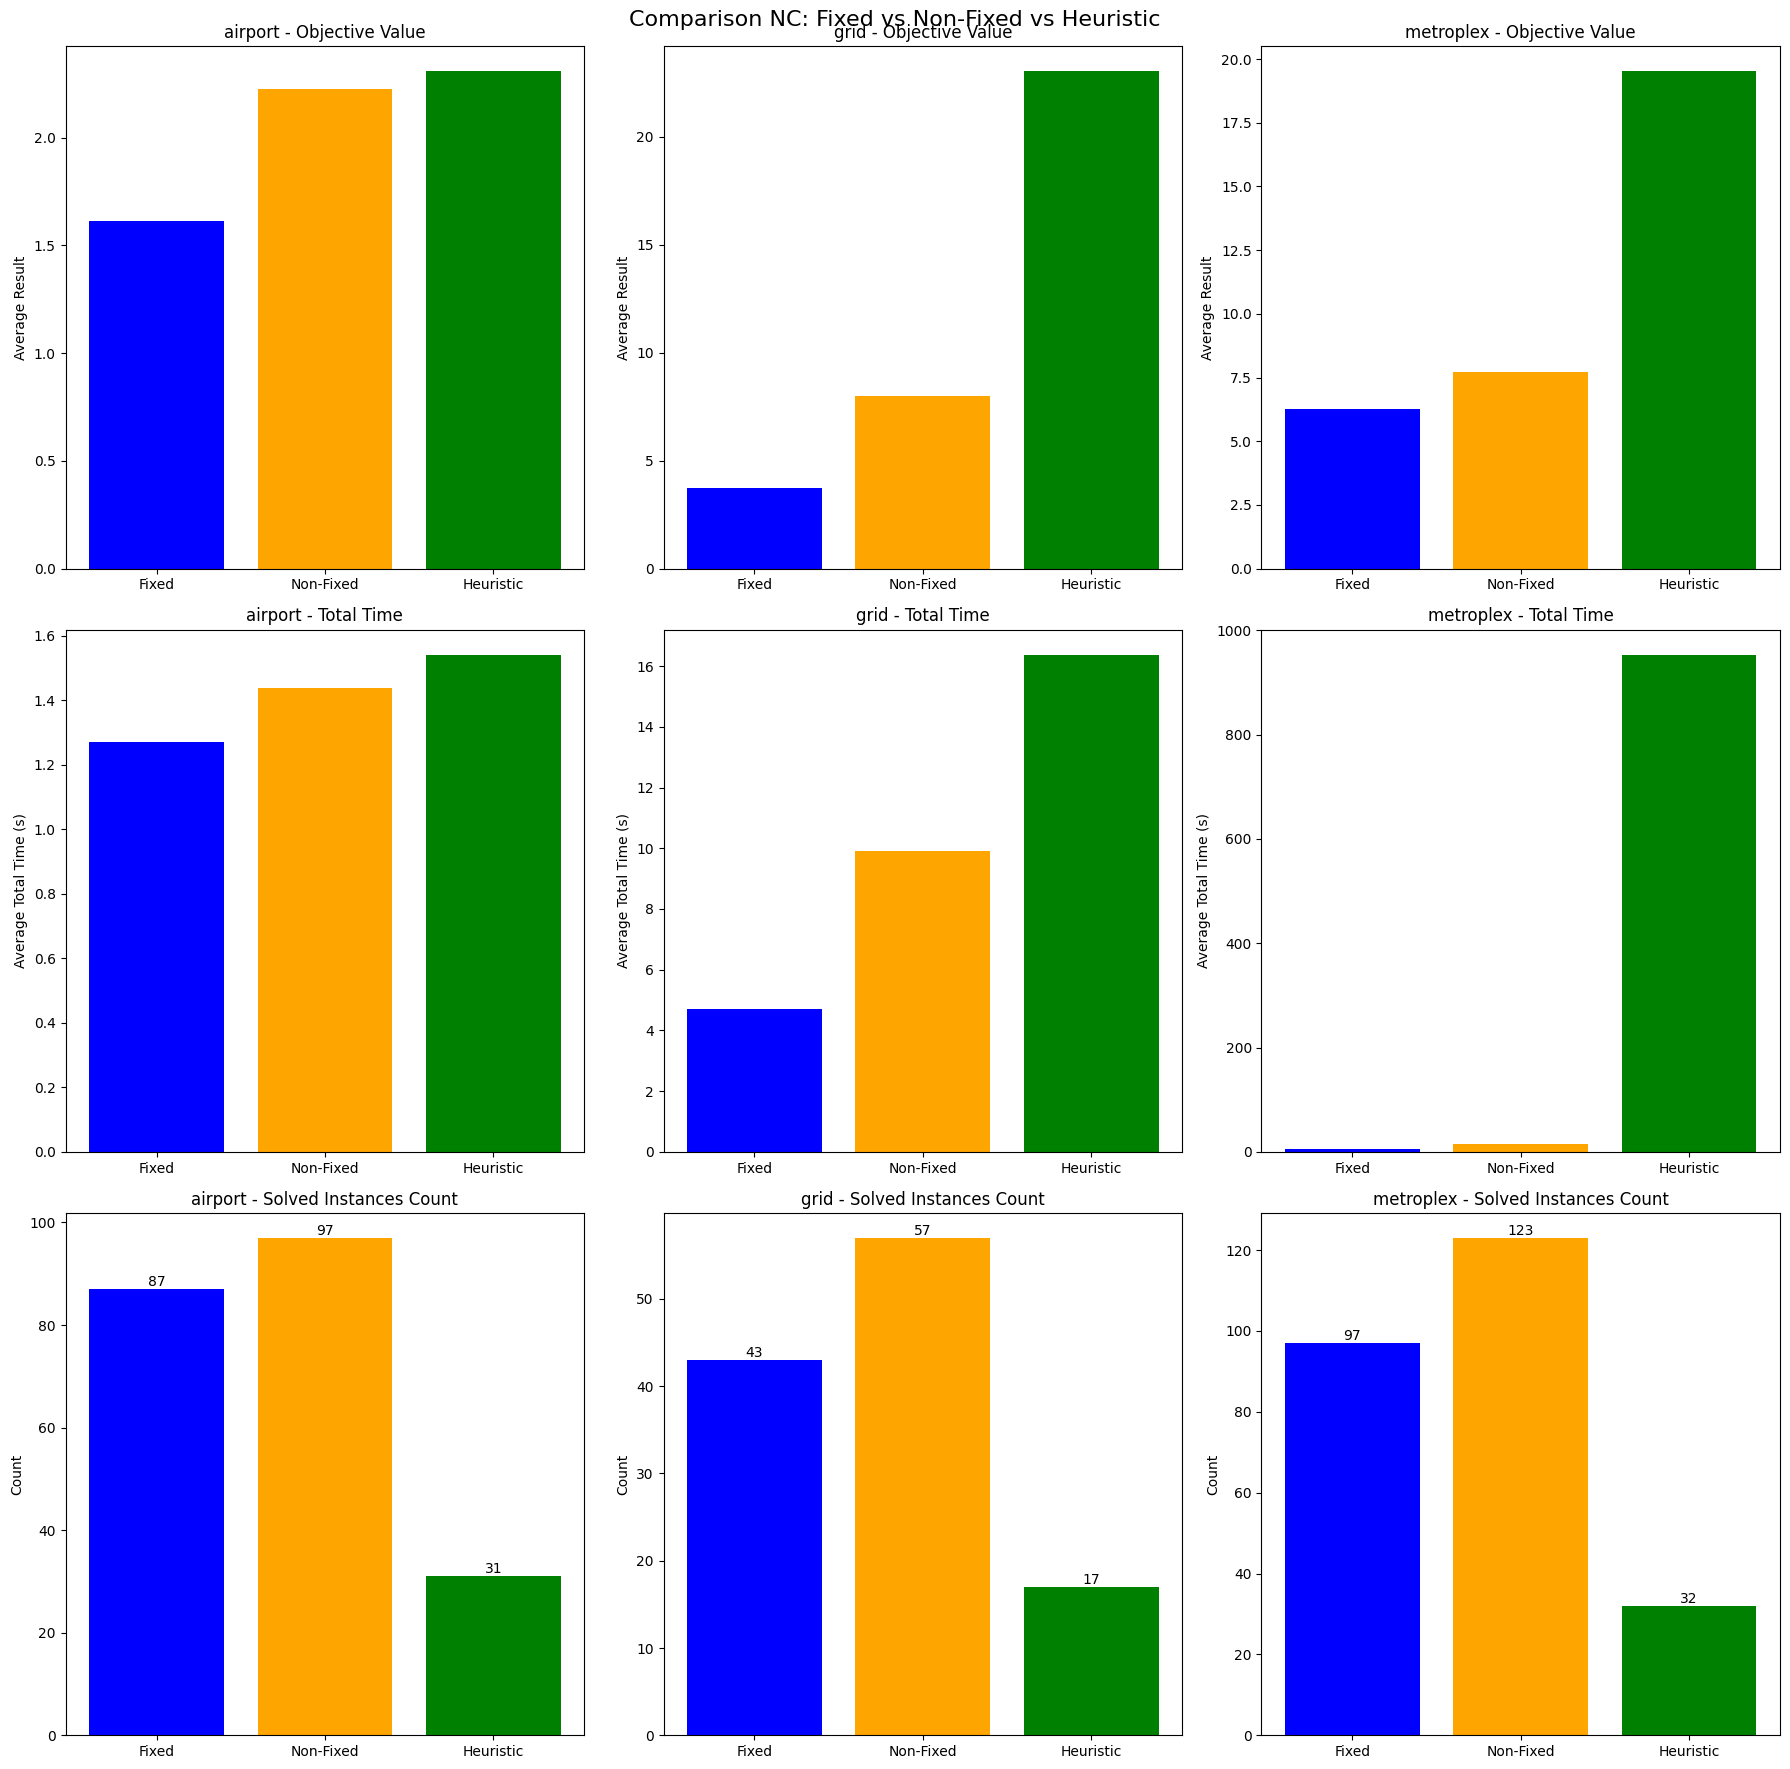


Detailed Differences NC (> 2e-6):
     instance Typology  result_Fixed  result_NonFixed  Improvement
10  airport15  airport      1.210526         0.894737     0.315789
11  airport15  airport      1.210526         1.024878     0.185648
12  airport15  airport      0.894737         1.210526    -0.315789
14  airport15  airport      0.894737         1.024878    -0.130141
15  airport15  airport      1.024878         1.210526    -0.185648
16  airport15  airport      1.024878         0.894737     0.130141
19   airport2  airport      1.157895         1.210526    -0.052631
20   airport2  airport      1.157895         1.263158    -0.105263
21   airport2  airport      1.210526         1.157895     0.052631
23   airport2  airport      1.210526         1.263158    -0.052632


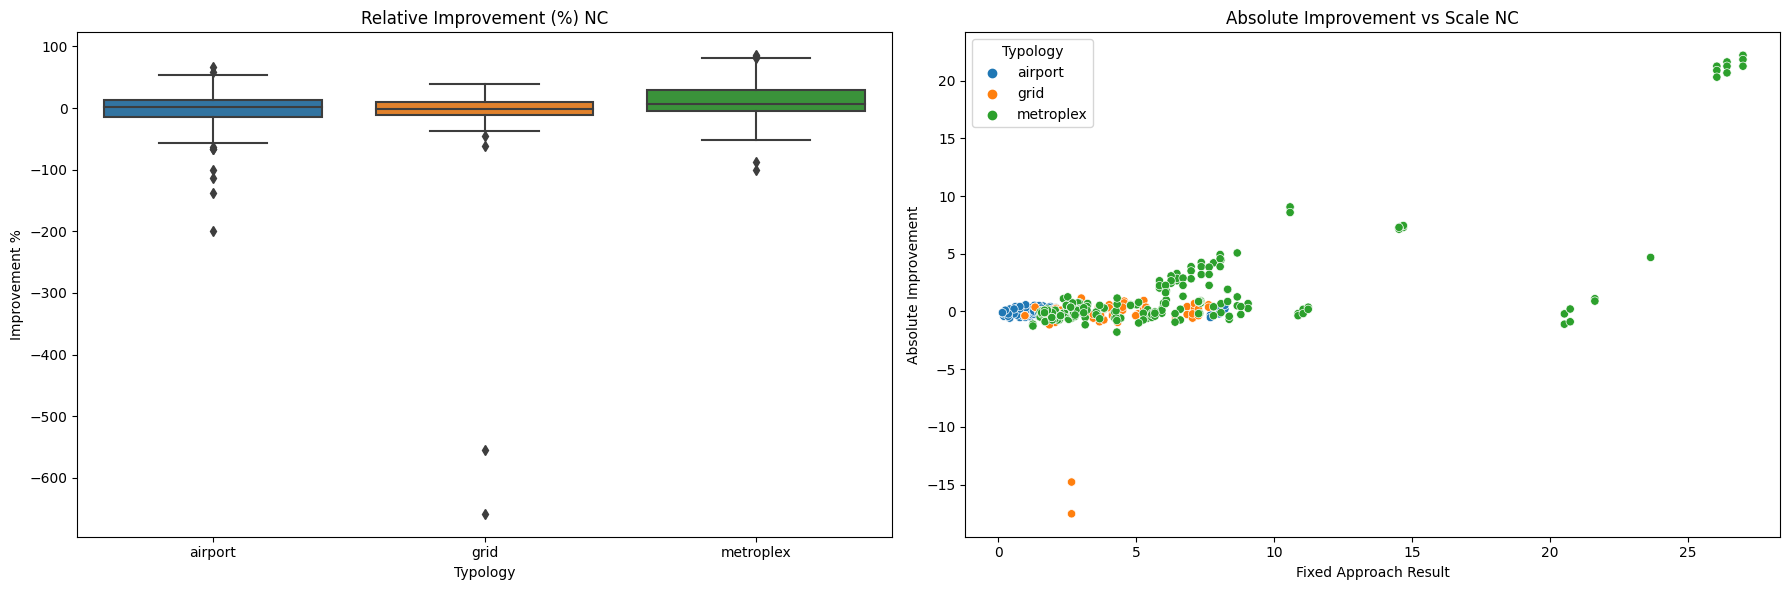

In [52]:
# Comparison for Non-Collaborative (NC) instances
print("--- Non-Collaborative (NC) Analysis ---")

comparison_data_NC = []
unsolved_summary_NC = []
detailed_diffs_NC = []
improved_feasibility_NC = []  # List to track instances solved ONLY by Non-Fixed

typologies_NC = ['airport', 'grid', 'metroplex']

for typ in typologies_NC:
    # Fixed approach
    fixed_data = pd.concat([df[df['instance'].str.contains(typ)] for df in dfsNCF], ignore_index=False)
    res_fixed = process_approach(fixed_data, typ, 'Fixed')
    if res_fixed: comparison_data_NC.append(res_fixed)
    
    # Non-fixed approach
    nonfixed_data = pd.concat([df[df['instance'].str.contains(typ)] for df in dfsNCNF], ignore_index=False)
    res_nonfixed = process_approach(nonfixed_data, typ, 'Non-Fixed')
    if res_nonfixed: comparison_data_NC.append(res_nonfixed)
    
    # Heuristic approach
    heur_data = pd.concat([df[df['instance'].str.contains(typ)] for df in dfsHeurNC], ignore_index=False)
    res_heur = process_approach(heur_data, typ, 'Heuristic')
    if res_heur: comparison_data_NC.append(res_heur)

    # Merge to compare instance by instance
    merged = pd.merge(fixed_data[['instance', 'result', 'totalTime']], 
                      nonfixed_data[['instance', 'result', 'totalTime']], 
                      on='instance', suffixes=('_Fixed', '_NonFixed'))
    
    # Check for instances solved in Non-Fixed but NOT in Fixed (Fixed is infinite, Non-Fixed is finite)
    newly_solved = merged[~np.isfinite(merged['result_Fixed']) & np.isfinite(merged['result_NonFixed'])]
    
    if not newly_solved.empty:
        for _, row in newly_solved.iterrows():
            improved_feasibility_NC.append({
                'Typology': typ,
                'Instance': row['instance'],
                'Fixed_Result': row['result_Fixed'],
                'NonFixed_Result': row['result_NonFixed']
            })

    # Differences (only where BOTH are solved)
    merged_solved = merged[np.isfinite(merged['result_Fixed']) & np.isfinite(merged['result_NonFixed'])]
    diff_mask = np.abs(merged_solved['result_Fixed'] - merged_solved['result_NonFixed']) > 2e-6
    diffs = merged_solved[diff_mask].copy()
    
    if not diffs.empty:
        diffs['Typology'] = typ
        diffs['Improvement'] = diffs['result_Fixed'] - diffs['result_NonFixed']
        diffs['Rel_Improvement'] = (diffs['Improvement'] / diffs['result_Fixed']) * 100
        detailed_diffs_NC.append(diffs)

comparison_df_NC = pd.DataFrame(comparison_data_NC)
print("Comparison of Solved Instances (NC):")
print(comparison_df_NC.to_string())

if unsolved_summary_NC:
    print("\nSummary of Unsolved Instances (NC):")
    print(pd.DataFrame(unsolved_summary_NC)[['Typology', 'Approach', 'Unsolved_Count']].to_string())

# Print count of instances solved ONLY by Non-Fixed
if improved_feasibility_NC:
    print(f"\nTotal instances solved by Non-Fixed but NOT by Fixed (NC): {len(improved_feasibility_NC)}")
else:
    print("\nNo instances found that are solved by Non-Fixed but not by Fixed.")

# Visualization
if not comparison_df_NC.empty:
    # Increased to 3 rows to include Solved Count
    fig, axes = plt.subplots(3, 3, figsize=(18, 18))
    fig.suptitle('Comparison NC: Fixed vs Non-Fixed vs Heuristic', fontsize=16)
    
    for idx, typ in enumerate(typologies_NC):
        data = comparison_df_NC[comparison_df_NC['Typology'] == typ]
        if not data.empty:
            # 1. Objective Value
            axes[0, idx].bar(data['Approach'], data['Avg_Result'], color=['blue', 'orange', 'green'])
            axes[0, idx].set_title(f'{typ} - Objective Value')
            axes[0, idx].set_ylabel('Average Result')
            
            # 2. Total Time
            axes[1, idx].bar(data['Approach'], data['Avg_TotalTime'], color=['blue', 'orange', 'green'])
            axes[1, idx].set_title(f'{typ} - Total Time')
            axes[1, idx].set_ylabel('Average Total Time (s)')

            # 3. Solved Count
            axes[2, idx].bar(data['Approach'], data['Solved_Count'], color=['blue', 'orange', 'green'])
            axes[2, idx].set_title(f'{typ} - Solved Instances Count')
            axes[2, idx].set_ylabel('Count')
            
            # Add text labels on bars for count
            for p in axes[2, idx].patches:
                axes[2, idx].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

if detailed_diffs_NC:
    all_diffs_NC = pd.concat(detailed_diffs_NC)
    print("\nDetailed Differences NC (> 2e-6):")
    print(all_diffs_NC[['instance', 'Typology', 'result_Fixed', 'result_NonFixed', 'Improvement']].head(10).to_string())
    
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    sns.boxplot(x='Typology', y='Rel_Improvement', data=all_diffs_NC, ax=ax[0])
    ax[0].set_title('Relative Improvement (%) NC')
    ax[0].set_ylabel('Improvement %')
    sns.scatterplot(x='result_Fixed', y='Improvement', hue='Typology', data=all_diffs_NC, ax=ax[1])
    ax[1].set_title('Absolute Improvement vs Scale NC')
    ax[1].set_xlabel('Fixed Approach Result')
    ax[1].set_ylabel('Absolute Improvement')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo significant differences found for NC.")